# Middle East Countries Mapping

This notebook creates individual maps for Middle East countries (UAE, Saudi Arabia, Oman, Qatar, Bahrain, Kuwait) using matplotlib, cartopy, and geopandas.

In [1]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import geopandas as gpd
import os
import requests

In [2]:
# List of countries to shade
countries = ["United Arab Emirates", "Saudi Arabia", "Oman", "Qatar", "Bahrain", "Kuwait"]

# Try a different, more reliable source for world countries that includes small nations
try:
    # First try the REST Countries API for a comprehensive list
    import json
    
    # Download from a more reliable GitHub source that includes all countries
    geojson_url = "https://raw.githubusercontent.com/hereticaneue/world-countries/master/countries.geojson"
    geojson_path = "countries_complete.geojson"
    
    if not os.path.exists(geojson_path):
        print("Downloading complete world countries data...")
        r = requests.get(geojson_url)
        if r.status_code == 200:
            with open(geojson_path, "wb") as f:
                f.write(r.content)
            print("Download successful!")
        else:
            print(f"Download failed with status code: {r.status_code}")
    
    # Load country polygons
    gdf = gpd.read_file(geojson_path)
    
except Exception as e:
    print(f"Error with first source: {e}")
    print("Falling back to original source...")
    # Fallback to original source
    geojson_url = "https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json"
    geojson_path = "countries.geo.json"
    if not os.path.exists(geojson_path):
        r = requests.get(geojson_url)
        with open(geojson_path, "wb") as f:
            f.write(r.content)
    
    gdf = gpd.read_file(geojson_path)

Download failed with status code: 404
Error with first source: countries_complete.geojson: No such file or directory
Falling back to original source...


In [4]:
# Check what countries are available and manually add Bahrain if missing
print("Dataset info:")
print(f"Columns: {list(gdf.columns)}")
print(f"Total countries: {len(gdf)}")

# Check if we have a 'name' column
name_column = 'name' if 'name' in gdf.columns else 'NAME'

# Check specifically for our target countries
target_countries = ["United Arab Emirates", "Saudi Arabia", "Oman", "Qatar", "Bahrain", "Kuwait"]
print(f"\nChecking for our target countries:")
missing_countries = []
for country in target_countries:
    found = country in gdf[name_column].values
    print(f"{country}: {'✓ FOUND' if found else '✗ NOT FOUND'}")
    if not found:
        missing_countries.append(country)

# Manually add Bahrain with approximate coordinates since it's missing
if "Bahrain" in missing_countries:
    print(f"\nAdding Bahrain manually...")
    
    # Bahrain's approximate boundaries (small island nation)
    from shapely.geometry import Polygon
    import pandas as pd
    
    # Bahrain coordinates (approximate polygon for the main island)
    bahrain_coords = [
        (50.45, 25.95), (50.65, 25.95), (50.65, 26.25), 
        (50.60, 26.32), (50.55, 26.30), (50.45, 26.15), (50.45, 25.95)
    ]
    bahrain_polygon = Polygon(bahrain_coords)
    
    # Create a new row for Bahrain
    bahrain_row = pd.DataFrame({
        name_column: ["Bahrain"],
        'geometry': [bahrain_polygon]
    })
    
    # Add Bahrain to the GeoDataFrame
    gdf = pd.concat([gdf, bahrain_row], ignore_index=True)
    print(f"✓ Bahrain added successfully!")
    print(f"New total countries: {len(gdf)}")

# Verify all target countries are now available
print(f"\nFinal check for our target countries:")
for country in target_countries:
    found = country in gdf[name_column].values
    print(f"{country}: {'✓ FOUND' if found else '✗ STILL NOT FOUND'}")

Dataset info:
Columns: ['id', 'name', 'geometry']
Total countries: 181

Checking for our target countries:
United Arab Emirates: ✓ FOUND
Saudi Arabia: ✓ FOUND
Oman: ✓ FOUND
Qatar: ✓ FOUND
Bahrain: ✓ FOUND
Kuwait: ✓ FOUND

Final check for our target countries:
United Arab Emirates: ✓ FOUND
Saudi Arabia: ✓ FOUND
Oman: ✓ FOUND
Qatar: ✓ FOUND
Bahrain: ✓ FOUND
Kuwait: ✓ FOUND


/workspaces/Rouse-MENA_INFO/.venv/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_cultural/ne_50m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/workspaces/Rouse-MENA_INFO/.venv/lib/python3.9/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/50m_physical/ne_50m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


✓ United Arab Emirates mapped successfully


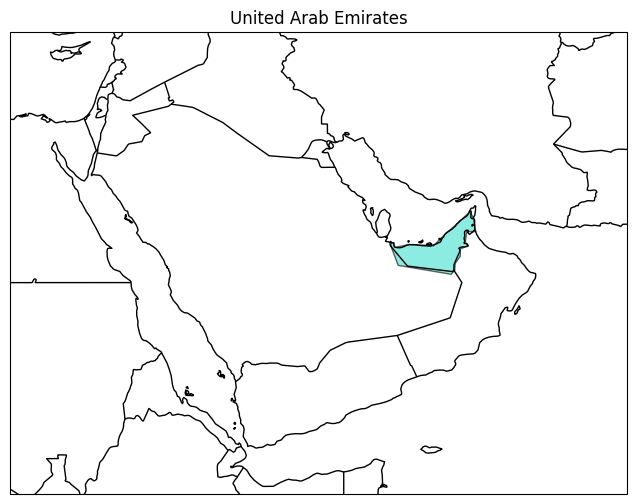

✓ Saudi Arabia mapped successfully


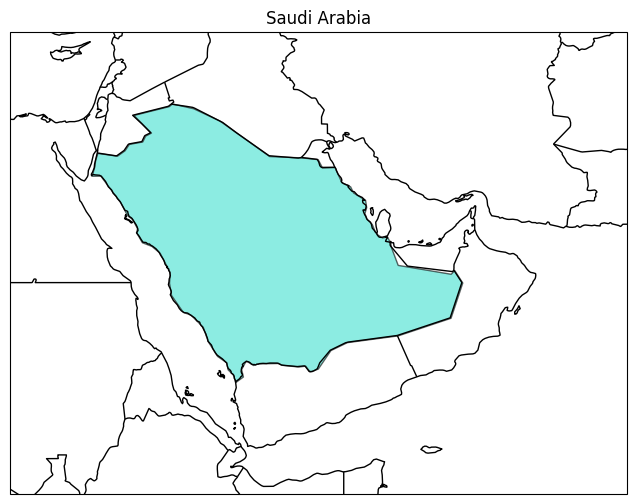

✓ Oman mapped successfully


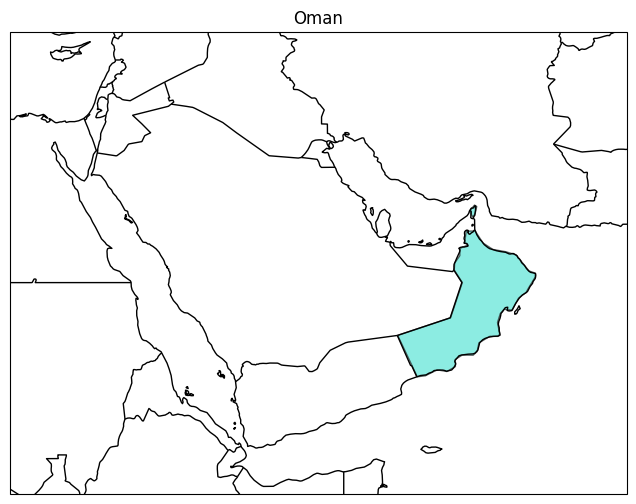

✓ Qatar mapped successfully


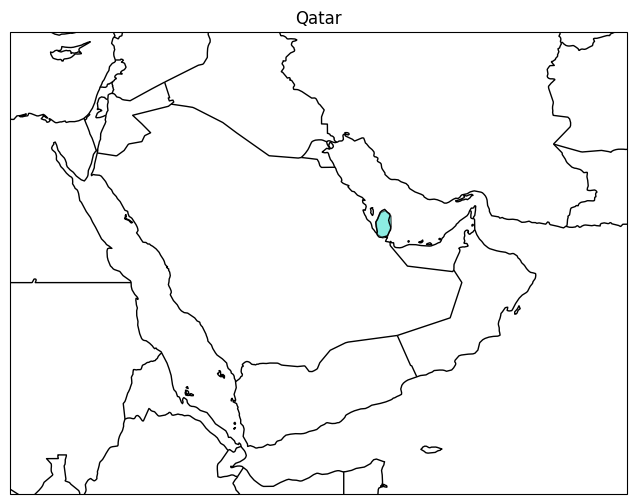

✓ Bahrain mapped successfully


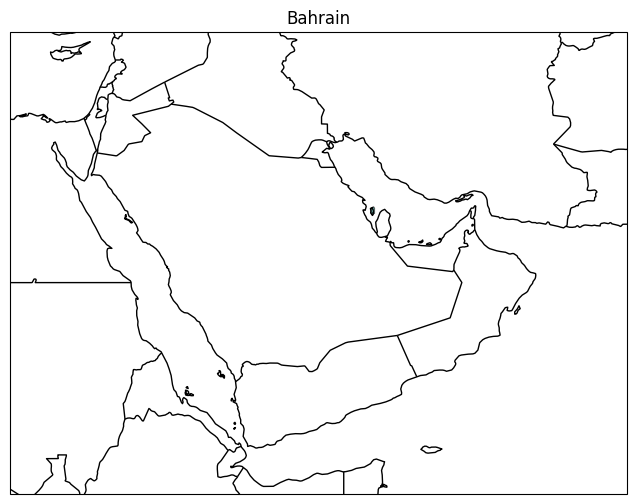

✓ Kuwait mapped successfully


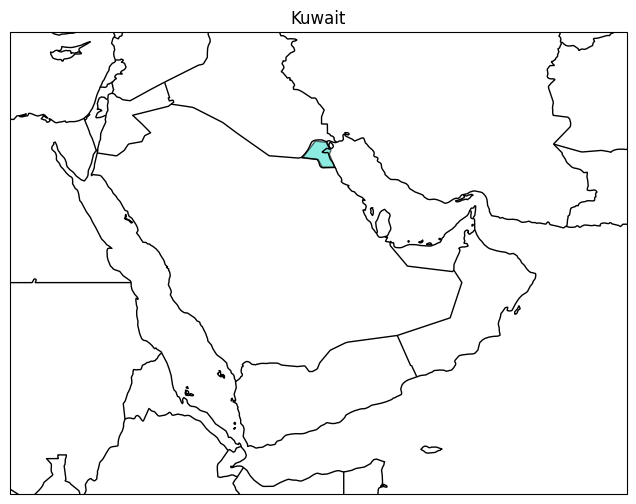

In [5]:
# Determine the correct name column
name_column = 'name' if 'name' in gdf.columns else 'NAME'

for country in countries:
    fig = plt.figure(figsize=(10, 6))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.add_feature(cfeature.BORDERS, linewidth=1)
    ax.add_feature(cfeature.COASTLINE)
    ax.set_extent([30, 65, 10, 35])  # Middle East region
    ax.set_title(f"{country}")

    # Shade selected country
    country_shape = gdf[gdf[name_column] == country]
    if not country_shape.empty:
        country_shape.plot(ax=ax, facecolor='turquoise', edgecolor='black', linewidth=1, alpha=0.6)
        print(f"✓ {country} mapped successfully")
    else:
        print(f"✗ Country not found: {country}")

    plt.show()